## Data Analysis on AirBNB Customer Data ##


Our data is Airbnb Customer Data. In this we have 19 columns and around 5000 rows. There are columns like Number of Rooms,Number of bedrooms,Customer ratings,Apartment/House value,etc

Our questions were 
1) What are the factors that play a role in selecting the room on AirBNB’s website

2) Are any of these factors related to each other?

3) Which Boroughs do customers prefer?

4) Preferred Price for Buying/Renting House or an Apartment

5) Do customers prefer shared room or entire apartment


In [181]:
#First importing all the libraries 
#Importing libraries like Seaborn,Numpy,Pandas,Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [182]:
#Now we are importing our file using Pandas read function and we are assigning the data to a data frame
df=pd.read_csv('AirBnB new.csv')

In [183]:
#Showing the head of the data frame
df.head()

room_id  survey_id     host_id    room_type Property Type  \
0   7739955.0     1438.0  38614070.0  Shared room         House   
1   7383173.0     1438.0  32628813.0  Shared room         House   
2  10250852.0     1438.0  35553123.0  Shared room         House   
3   2188359.0     1438.0   5029659.0  Shared room     Apartment   
4  19661354.0     1438.0  70038324.0  Shared room     Apartment   

   Area House Age  Number of Rooms  Number of Bedrooms  Area_Population  \
0               6                1                 1.0          23087.0   
1               6                2                 3.0          40173.0   
2               6                9                 7.0          36882.0   
3               7                6                 3.0          34310.0   
4               5                1                 1.0          26354.0   

   Price  reviews  overall_satisfaction  accommodates  Apartment_Value  \
0   85.0      6.0                   4.0             4        1059034.0   
1   90.0     14.0                   4.0             6        1505891.0   
2  239.0      3.0                   4.0             6        1058988.0   
3  165.0     35.0                   4.0             2        1260617.0   
4    NaN      0.0                   1.0             2         630943.0   

     Borough     neighborhood   latitude  longitude  \
0     Queens  Jackson Heights  40.749909 -73.876880   
1   Brooklyn    Cypress Hills  40.678527 -73.889584   
2   Brooklyn   Sheepshead Bay  40.583041 -73.957976   
3  Manhattan   Hell's Kitchen  40.758374 -73.991955   
4  Manhattan  Upper East Side  40.761960 -73.959733   

                              Advertisement  
0           Room TO SHARE by DAY,week,month  
1         Spacious Room: Close to Manhattan  
2                                COZY COUCH  
3         1 Bdrm Apt 1 Block from Times Sq.  
4  NYC Upper East / Midtown East Luxury 1BR

We can see from the data that there are around 17 columns in our data. Data like Number of rooms, Number of bedrooms, population of the area in which the rooms are located,Value of the house etc.

In [184]:
#Now lets check the information of the columns using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
room_id                 4987 non-null float64
survey_id               4987 non-null float64
host_id                 4986 non-null float64
room_type               5000 non-null object
Property Type           5000 non-null object
Area House Age          5000 non-null int64
Number of Rooms         5000 non-null int64
Number of Bedrooms      4992 non-null float64
Area_Population         4995 non-null float64
Price                   4992 non-null float64
reviews                 4996 non-null float64
overall_satisfaction    4998 non-null float64
accommodates            5000 non-null int64
Apartment_Value         4997 non-null float64
Borough                 5000 non-null object
neighborhood            4997 non-null object
latitude                4994 non-null float64
longitude               4987 non-null float64
Advertisement           4991 non-null object
dtypes: float64(11), int64(3),

We can see that around 5000 entries and around 19 columns. Majority of this columns has integer or float data in them. Now lets call the describe function on this data frame to check the statistics like max,min,mean etc.

In [185]:
df.describe()

room_id  survey_id       host_id  Area House Age  Number of Rooms  \
count  4.987000e+03     4987.0  4.986000e+03     5000.000000      5000.000000   
mean   1.063180e+07     1438.0  3.505037e+07        5.974800         2.783000   
std    6.211317e+06        0.0  3.870568e+07        1.038066         2.149147   
min    5.136000e+03     1438.0  2.339000e+03        3.000000         1.000000   
25%    4.866421e+06     1438.0  4.792800e+06        5.000000         1.000000   
50%    1.131923e+07     1438.0  1.877644e+07        6.000000         2.000000   
75%    1.616763e+07     1438.0  5.166501e+07        7.000000         3.000000   
max    1.987405e+07     1438.0  1.405179e+08       10.000000        11.000000   

       Number of Bedrooms  Area_Population        Price      reviews  \
count         4992.000000     4.995000e+03  4992.000000  4996.000000   
mean             3.199119     3.799193e+04   337.300280    13.702962   
std              1.396541     7.888732e+04   399.132704    25.356285   
min              1.000000     1.730000e+02    10.000000     0.000000   
25%              2.000000     2.940250e+04   210.000000     0.000000   
50%              3.000000     3.622700e+04   282.000000     3.000000   
75%              4.000000     4.289900e+04   400.000000    15.000000   
max              8.000000     4.503130e+06  9999.000000   327.000000   

       overall_satisfaction  accommodates  Apartment_Value     latitude  \
count           4998.000000   5000.000000     4.997000e+03  4994.000000   
mean               3.408163      4.554600     1.232083e+06    40.728428   
std                1.761968      3.046978     3.532031e+05     0.046123   
min                0.000000      1.000000     1.593900e+04    40.508684   
25%                2.000000      2.000000     9.974530e+05    40.706379   
50%                4.000000      4.000000     1.232872e+06    40.727707   
75%                5.000000      6.000000     1.471747e+06    40.756072   
max                5.000000     16.000000     2.469066e+06    40.903379   

         longitude  
count  4987.000000  
mean    -73.969070  
std       0.040272  
min     -74.239859  
25%     -73.993864  
50%     -73.979828  
75%     -73.954098  
max     -73.702257

We can see from this that the average House of the age is minimum 6 years,number of bedrooms is 2, average price of the room is $336 etc. 

In [186]:
#This dataset has some columns which are not needed like survey_id which is not needed. Also, the names of some rows are 
#not consistent with one another. We will perform data cleaning

df = df.drop('survey_id', axis=1)
df = df.rename(columns = {'room_id':'Room_ID','room_type': 'Room_Type','Property Type': 'Property_Type','host_id': 'Host_ID', 'Area House Age': 'House_Age', 'Number of Rooms': 'Number_of_Rooms', 'Number of Bedrooms': 'Number_of_Bedrooms', 'reviews': 'Reviews','overall_satisfaction': 'Overall_Satisfaction', 'accommodates': 'Accomodates', 'neighborhood': 'Neighborhood','latitude': 'Latitude', 'longitude': 'Longitude'})

In [187]:
df

Room_ID      Host_ID        Room_Type Property_Type  House_Age  \
0      7739955.0   38614070.0      Shared room         House          6   
1      7383173.0   32628813.0      Shared room         House          6   
2     10250852.0   35553123.0      Shared room         House          6   
3      2188359.0    5029659.0      Shared room     Apartment          7   
4     19661354.0   70038324.0      Shared room     Apartment          5   
5     19784887.0   47733373.0      Shared room         House          5   
6     14911027.0     539240.0      Shared room     Apartment          6   
7      3120957.0       8703.0      Shared room     Apartment          7   
8     19160115.0   27120086.0      Shared room     Apartment          5   
9      1472002.0    3003563.0      Shared room     Apartment          4   
10    15144508.0   47666490.0      Shared room         House          8   
11           NaN          NaN      Shared room     Apartment          4   
12    10849426.0   56193545.0      Shared room     Apartment          8   
13     4987370.0   25711730.0      Shared room     Apartment          7   
14     4809056.0    5715779.0      Shared room     Apartment          5   
15    16242765.0  104177785.0      Shared room     Apartment          5   
16    15230907.0   96424121.0      Shared room         House          5   
17     1526741.0    6486116.0      Shared room     Apartment          5   
18    12489666.0   67617579.0      Shared room         House          6   
19     4047932.0   20989479.0      Shared room     Apartment          6   
20    12970866.0   25749667.0      Shared room     Apartment          7   
21           NaN   29239547.0      Shared room     Apartment          6   
22     2581033.0   13217673.0      Shared room     Apartment          4   
23     2485482.0   12718658.0      Shared room     Apartment          6   
24     2028432.0   10243387.0      Shared room     Apartment          5   
25      923729.0    4887492.0      Shared room     Apartment          8   
26    12647229.0   68690066.0      Shared room     Apartment          4   
27     6886187.0   16978260.0      Shared room     Apartment          5   
28    17423307.0   74106432.0      Shared room     Apartment          6   
29     8521368.0     651596.0      Shared room     Apartment          7   
...          ...          ...              ...           ...        ...   
4970  16316481.0   37617977.0  Entire home/apt     Apartment          7   
4971  18186043.0   64891487.0  Entire home/apt     Apartment          6   
4972   6836391.0    5087088.0  Entire home/apt     Apartment          8   
4973   9827309.0   24550067.0  Entire home/apt     Apartment          7   
4974  19135956.0   23652900.0  Entire home/apt     Apartment          6   
4975   4137129.0   21462353.0  Entire home/apt     Apartment          8   
4976    195966.0     953370.0  Entire home/apt     Apartment          5   
4977  14204631.0    2063794.0  Entire home/apt     Apartment          7   
4978   5106020.0   26383567.0  Entire home/apt     Apartment          9   
4979  12186431.0   65492095.0  Entire home/apt         House          5   
4980  18793633.0   38609043.0  Entire home/apt     Apartment          6   
4981  18972993.0   28415743.0  Entire home/apt     Apartment          6   
4982   6150855.0   14083909.0  Entire home/apt     Apartment          6   
4983  12713090.0   23919461.0  Entire home/apt     Apartment          8   
4984   7964931.0   19851791.0  Entire home/apt     Apartment          5   
4985  13291853.0     993817.0  Entire home/apt     Apartment          6   
4986  17329090.0  116992515.0  Entire home/apt     Apartment          6   
4987  14738282.0   21336757.0  Entire home/apt     Apartment          6   
4988   8809578.0   14914020.0  Entire home/apt     Apartment          7   
4989  12738790.0   18351258.0  Entire home/apt     Apartment          6   
4990  18917232.0   22036019.0  Entire home/apt     Apartment          5   
4991  16133477.0  105236372.0  Ent

We will now check if there are any null values present in the cells. 

In [188]:
#Shows the number of cells in the column with null data
df.isnull().sum()

Room_ID                 13
Host_ID                 14
Room_Type                0
Property_Type            0
House_Age                0
Number_of_Rooms          0
Number_of_Bedrooms       8
Area_Population          5
Price                    8
Reviews                  4
Overall_Satisfaction     2
Accomodates              0
Apartment_Value          3
Borough                  0
Neighborhood             3
Latitude                 6
Longitude               13
Advertisement            9
dtype: int64

This now shows that the values are missing. We can deal with this problem in two ways - either drop the rows having empty cells or add a mean value of the column in the numerical cells where data is missing. We will use the second approach. In case of text cells that dont have any data, we will add text as "No Data Available".

In [189]:
#Below code replaces null value in Advertisement column with "No Data Available"
df.Advertisement = df.Advertisement.fillna('No Data Available')

#Below code replaces null value in Neighborhood column with "No Data Available"
df.Neighborhood = df.Neighborhood.fillna('No Data Available')

#Below code replaces null value in Longitude column with the mean of the Longitude column
df['Longitude'].fillna((df['Longitude'].mean()), inplace = True)

#Below code replaces null value in Latitude column with the mean of the Latitude column
df['Latitude'].fillna((df['Latitude'].mean()), inplace = True)

#Below code replaces null value in Apartment_Value column with the mean of the Apartment_Value column
df['Apartment_Value'].fillna((df['Apartment_Value'].mean()), inplace = True)

#Below code replaces null value in Reviews column with the mean of the Reviews column
df['Reviews'].fillna((df['Reviews'].mean()), inplace = True)

#Below code replaces null value in Price column with the mean of the Price column
df['Price'].fillna((df['Price'].mean()), inplace = True)

#Below code replaces null value in Area_Population column with the mean of the Area_Population column
df['Area_Population'].fillna((df['Area_Population'].mean()), inplace = True)

#Below code replaces null value in Number_of_Bedrooms column with the mean of the Number_of_Bedrooms column
df['Number_of_Bedrooms'].fillna((df['Number_of_Bedrooms'].mean()), inplace = True)

#Below code replaces null value in Host_ID column with the mean of the Host_ID column
df['Host_ID'].fillna((df['Host_ID'].mean()), inplace = True)

#Below code replaces null value in Room_ID column with the mean of the Room_ID column
df['Room_ID'].fillna((df['Room_ID'].mean()), inplace = True)

In [190]:
#Shows the number of cells in the column with null data
df.isnull().sum()

Room_ID                 0
Host_ID                 0
Room_Type               0
Property_Type           0
House_Age               0
Number_of_Rooms         0
Number_of_Bedrooms      0
Area_Population         0
Price                   0
Reviews                 0
Overall_Satisfaction    2
Accomodates             0
Apartment_Value         0
Borough                 0
Neighborhood            0
Latitude                0
Longitude               0
Advertisement           0
dtype: int64

## EDA

In [191]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [192]:
#Bar graph for age of house vs mean prices
#As the age of house increases the price decreases approx
df.iplot(kind='bar',x='House_Age',y='Price')

In [193]:
#This shows the distribution plot of Apartment values where the majority value is between $500000 and $2000000
df.iplot(kind='hist')

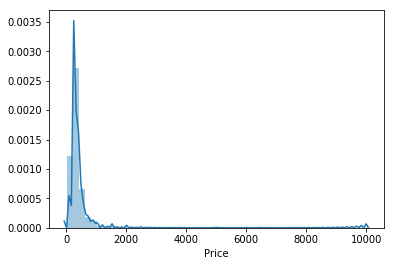

In [194]:
sns.distplot(df['Price'])

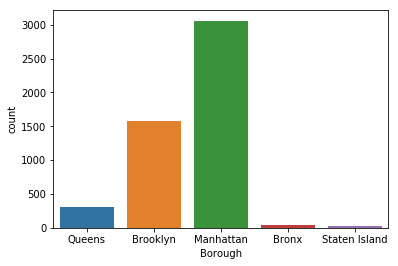

In [195]:
#This shows the graph for Borough vs the count where Manhattan has the maximum number of houses listed on the website
sns.countplot(x='Borough', data=df)

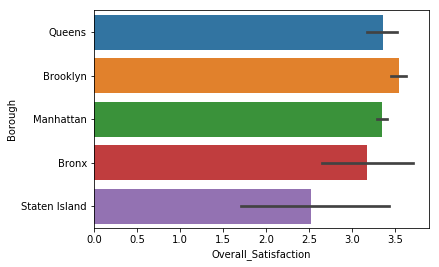

In [196]:
#This shows the bar plot for Overall satisfaction vs Borough where it states that Brooklyn houses provide better overall satisfaction than the rest 
sns.barplot(x='Overall_Satisfaction',y='Borough', data=df)

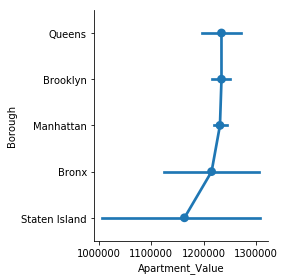

In [197]:
#This is the factor plot for Apartment value vs Borough where the price of houses in Queens is maximum
sns.factorplot(x='Apartment_Value',y='Borough', data=df)

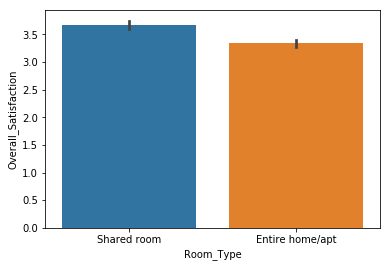

In [198]:
#This is the bar plot for Room type vs Overall satisfaction where it shows that shared room are rated above enitre home/apt
sns.barplot(x='Room_Type',y='Overall_Satisfaction',data=df)

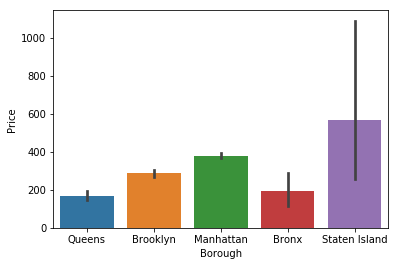

In [199]:
#This is the bar plot for Borough vs mean prices where Staten Island houses have maximum mean prices

sns.barplot(x='Borough',y='Price',data=df)

In [200]:
#From scikit learn import train test split function to split the data into two parts called train and test data

from sklearn.cross_validation import train_test_split

In [201]:
df['Property_Type'] = df['Property_Type'].replace({"Apartment": 0,"House":1})
df.head()


Room_ID     Host_ID    Room_Type  Property_Type  House_Age  \
0   7739955.0  38614070.0  Shared room              1          6   
1   7383173.0  32628813.0  Shared room              1          6   
2  10250852.0  35553123.0  Shared room              1          6   
3   2188359.0   5029659.0  Shared room              0          7   
4  19661354.0  70038324.0  Shared room              0          5   

   Number_of_Rooms  Number_of_Bedrooms  Area_Population      Price  Reviews  \
0                1                 1.0          23087.0   85.00000      6.0   
1                2                 3.0          40173.0   90.00000     14.0   
2                9                 7.0          36882.0  239.00000      3.0   
3                6                 3.0          34310.0  165.00000     35.0   
4                1                 1.0          26354.0  337.30028      0.0   

   Overall_Satisfaction  Accomodates  Apartment_Value    Borough  \
0                   4.0            4        1059034.0     Queens   
1                   4.0            6        1505891.0   Brooklyn   
2                   4.0            6        1058988.0   Brooklyn   
3                   4.0            2        1260617.0  Manhattan   
4                   1.0            2         630943.0  Manhattan   

      Neighborhood   Latitude  Longitude  \
0  Jackson Heights  40.749909 -73.876880   
1    Cypress Hills  40.678527 -73.889584   
2   Sheepshead Bay  40.583041 -73.957976   
3   Hell's Kitchen  40.758374 -73.991955   
4  Upper East Side  40.761960 -73.959733   

                              Advertisement  
0           Room TO SHARE by DAY,week,month  
1         Spacious Room: Close to Manhattan  
2                                COZY COUCH  
3         1 Bdrm Apt 1 Block from Times Sq.  
4  NYC Upper East / Midtown East Luxury 1BR

In [202]:
#In this as shown in figure the independent variables are assigned X and the value to be predicted is y
#Now using the train test split in that the test_size=0.3 means that the 30% of data will be used as train data and 70% data as test
X=df[['House_Age','Number_of_Rooms','Number_of_Bedrooms','Area_Population','Property_Type','Reviews']]
y=df['Apartment_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


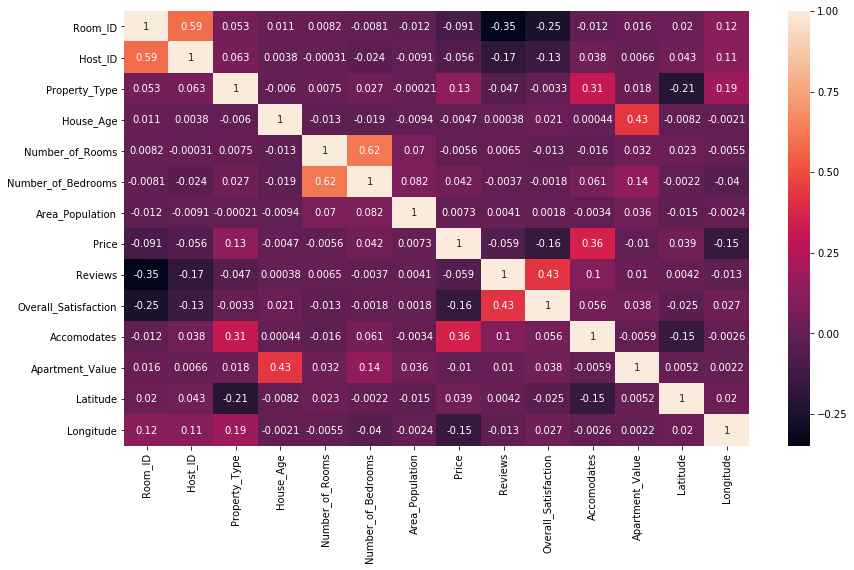

In [203]:
#This figure shows a correlations between different columns of the dataframe
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [204]:
from sklearn.linear_model import Ridge

In [205]:
ridgeReg = Ridge()

In [206]:
ridgeReg.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [207]:
pred = ridgeReg.predict(X_test)

In [208]:
import statistics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))  
statistics.mean(df['Apartment_Value'])

Mean Absolute Error: 250538.3690986368
Mean Squared Error: 99703899319.14017
Root Mean Squared Error: 315759.2426503778


1232082.7428457073

In This as the value of RSME is sightly greater than 10% of mean value trying to predict.
Model didn't perform very well
There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict. 

In [35]:
#Now we are changing the value of room_type to binary 0,1 to use that as a categorical variable in logistic regression
df['Room_Type'].replace('Shared room', 0,inplace=True)

df['Room_Type'].replace('Entire home/apt', 1,inplace=True)

In [36]:
df.head()

Room_ID     Host_ID  Room_Type Property_Type  House_Age  \
0   7739955.0  38614070.0          0         House          6   
1   7383173.0  32628813.0          0         House          6   
2  10250852.0  35553123.0          0         House          6   
3   2188359.0   5029659.0          0     Apartment          7   
4  19661354.0  70038324.0          0     Apartment          5   

   Number_of_Rooms  Number_of_Bedrooms  Area_Population      Price  Reviews  \
0                1                 1.0          23087.0   85.00000      6.0   
1                2                 3.0          40173.0   90.00000     14.0   
2                9                 7.0          36882.0  239.00000      3.0   
3                6                 3.0          34310.0  165.00000     35.0   
4                1                 1.0          26354.0  337.30028      0.0   

   Overall_Satisfaction  Accomodates  Apartment_Value    Borough  \
0                   4.0            4        1059034.0     Queens   
1                   4.0            6        1505891.0   Brooklyn   
2                   4.0            6        1058988.0   Brooklyn   
3                   4.0            2        1260617.0  Manhattan   
4                   1.0            2         630943.0  Manhattan   

      Neighborhood   Latitude  Longitude  \
0  Jackson Heights  40.749909 -73.876880   
1    Cypress Hills  40.678527 -73.889584   
2   Sheepshead Bay  40.583041 -73.957976   
3   Hell's Kitchen  40.758374 -73.991955   
4  Upper East Side  40.761960 -73.959733   

                              Advertisement  
0           Room TO SHARE by DAY,week,month  
1         Spacious Room: Close to Manhattan  
2                                COZY COUCH  
3         1 Bdrm Apt 1 Block from Times Sq.  
4  NYC Upper East / Midtown East Luxury 1BR

In [37]:
X=df[['Number_of_Rooms','Area_Population','Price','Accomodates']]
y=df['Room_Type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log=LogisticRegression()

In [40]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predicts=log.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predicts))
print('\n')
print(confusion_matrix(y_test,predicts))

             precision    recall  f1-score   support

          0       0.98      0.54      0.70       320
          1       0.89      1.00      0.94      1180

avg / total       0.91      0.90      0.89      1500



[[ 174  146]
 [   4 1176]]


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
predict=knn.predict(X_test)

In [48]:
print(classification_report(y_test,predicts))
print('\n')
print(confusion_matrix(y_test,predicts))


             precision    recall  f1-score   support

          0       0.98      0.54      0.70       320
          1       0.89      1.00      0.94      1180

avg / total       0.91      0.90      0.89      1500



[[ 174  146]
 [   4 1176]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [52]:
predictionknn=knn.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))

             precision    recall  f1-score   support

          0       0.89      0.90      0.89       320
          1       0.97      0.97      0.97      1180

avg / total       0.95      0.95      0.95      1500

[[ 287   33]
 [  35 1145]]


# ELBOW METHOD

We need to increase the precision for that we need to find a value of k such that the value for error is decreased and precision increases. So this can be achieved through elbow method

In [55]:
error_rate=[]
for i in range(1,40):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    predict_i=KNN.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

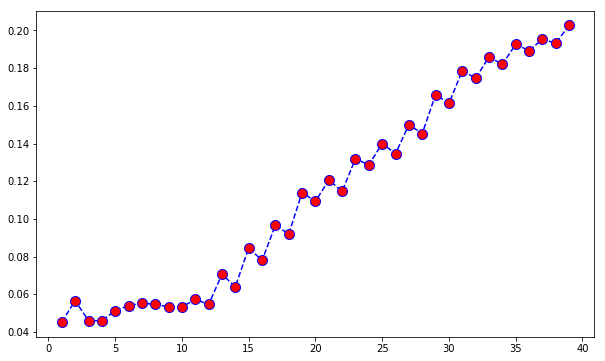

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='Blue',marker='o',linestyle='dashed',markerfacecolor='red',markersize=10)

This shows that value of k is minimum around value of k=3 or 4. So we can try with value of k=3 and 4 and see the value of precision

In [57]:
knn=KNeighborsClassifier(n_neighbors=4)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [59]:
predictionknn=knn.predict(X_test)

In [60]:
print(classification_report(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89       320
          1       0.97      0.97      0.97      1180

avg / total       0.95      0.95      0.95      1500

[[ 286   34]
 [  35 1145]]


Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc=DecisionTreeClassifier()

In [63]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
pre=dtc.predict(X_test)

In [65]:
print(classification_report(y_test,pre))
print(confusion_matrix(y_test,pre))

             precision    recall  f1-score   support

          0       0.91      0.91      0.91       320
          1       0.98      0.97      0.98      1180

avg / total       0.96      0.96      0.96      1500

[[ 292   28]
 [  30 1150]]


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc=RandomForestClassifier(n_estimators=200)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
pred5=rfc.predict(X_test)

In [70]:
print(classification_report(y_test,pred5))
print(confusion_matrix(y_test,pred5))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       320
          1       0.98      0.98      0.98      1180

avg / total       0.97      0.97      0.97      1500

[[ 300   20]
 [  20 1160]]


So, we can use this Random Forest Classifier for attaining more mode accuracy and precision, but also to avoid model overfitting.

## Conclusions ##

1) Apartment Value is related to No. of Bedrooms, House Age, No. of Rooms and Area Population

2) Customers prefer renting new houses as compared to older ones

3) When selecting a room or buying a house in NewYork people prefer areas like Manhattan and Brooklyn as compared to Staten Island and Bronx

4) Customers prefer the price of the rented rooms to be between $100-$500

5) Customers satisfaction rating for Shared Room is more than the ratings for an entire apartment